In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Cosine Learning Rate Policy
https://arxiv.org/pdf/1608.03983.pdf


In [2]:
import math
def lr_func_cosine(cur_epoch, max_epoch, base_lr, end_lr):
    """
    Retrieve the learning rate to specified values at specified epoch with the
    cosine learning rate schedule. Details can be found in:
    Ilya Loshchilov, and  Frank Hutter
    SGDR: Stochastic Gradient Descent With Warm Restarts.
    Args:
        cfg (CfgNode): configs. Details can be found in
            slowfast/config/defaults.py
        cur_epoch (float): the number of epoch of the current training stage.
    """
    assert end_lr < base_lr
    return (
        end_lr
        + (base_lr - end_lr)
        * (math.cos(math.pi * cur_epoch / max_epoch) + 1.0)
        * 0.5
    )

In [30]:
max_epoch = 5
base_lr = 0.1
end_lr = 0.00
epochs = np.linspace(0,4*max_epoch,320)
vec_cosine_lr = np.vectorize(lr_func_cosine)
lr_vals = vec_cosine_lr(epochs, max_epoch, base_lr, end_lr)

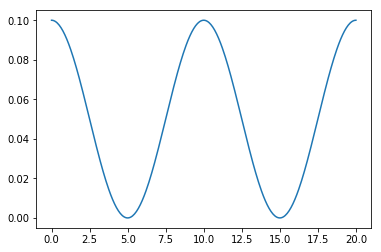

In [32]:
fig = plt.figure()
ax = plt.axes()

ax.plot(epochs, lr_vals);

In [33]:
#Updates vocab dict in place from a token list    
def update_vocab(vocab, token_list):
    for token in token_list:
        if token in vocab:
            continue
        else:
            vocab[token] = vocab[' counter ']
            vocab[' counter '] += 1
            
ans_vocab = {} #Used for descriptive questions
ans_vocab[' counter '] = 0
possible_ans = ["0", "1", "2", "3", "4", "5", 
            "yes", "no", "rubber", "metal",
            "blue", "purple", "yellow", "cyan"
]
update_vocab(ans_vocab, possible_ans)

In [39]:
import torch
def parse_glove_file(file_name, emb_dim, vocab_dict):
    """
    Opens a Glove pretrained embeddings file with embeddings with dimension emb_dim
    Builds a matrix vocab_size x emb_dim, compatible with nn.Embedding to be used with vocab_dict
    """
    word_list = []
    for word in vocab_dict.keys():
        word_list.append(word)
    emb_mat = np.zeros((len(vocab_dict), emb_dim))
    with open(file_name, 'rb') as f:
        for l in f:
            line = l.decode().split()
            word = line[0]
            if not word in vocab_dict:
                continue
            vect = np.array(line[1:]).astype(np.float)
            emb_mat[vocab_dict[word]] = vect
            word_list.remove(word)
    if len(word_list) > 0:
        print("Missing following words")
        print(word_list)
    return torch.from_numpy(emb_mat)

In [40]:
vocab_dict = ans_vocab
emb_mat = parse_glove_file("/Users/zeba/Desktop/POC/singularity-vm/datasets/word_embs/glove.6B/glove.6B.50d.txt", 50, vocab_dict)

Missing following words
[' counter ']


In [41]:
emb_mat

tensor([[-2.5990e-01,  7.7356e-01,  3.5438e-01,  1.0866e+00,  4.3132e-01,
          5.6912e-01,  8.9467e-01, -2.8327e-01, -9.1370e-01,  3.6018e-01,
         -6.0655e-02, -3.4676e-01, -4.5188e-01, -1.8003e+00, -2.8759e-01,
         -5.7913e-01,  4.0716e-01, -7.2440e-01, -2.0067e+00,  1.1478e+00,
         -1.1683e+00, -1.0050e+00,  1.7780e+00,  1.0412e+00, -8.6130e-01,
          4.5145e-02,  1.5059e+00, -2.5119e-01,  7.1285e-01, -6.6814e-01,
          2.5142e+00,  1.2941e+00,  1.7046e-02,  3.9161e-01,  6.4801e-01,
         -6.8647e-01,  7.1259e-01,  2.1012e-01,  2.8067e-01, -1.0846e-01,
          9.3836e-01, -4.7266e-01,  5.6314e-01, -6.5220e-01, -1.0101e+00,
          2.3917e+00, -7.7347e-02, -4.6669e-01,  1.3464e+00,  8.1261e-02],
        [-3.2313e-01,  8.9266e-01,  5.4943e-01,  5.9294e-01,  5.6707e-01,
          3.7888e-01, -3.6071e-02, -1.8445e-01, -6.1020e-01, -2.7874e-01,
          1.9870e-01, -1.3458e-01, -1.2000e-01, -8.0437e-01,  6.9032e-01,
         -5.6864e-01, -3.7870e-01,  2

## Plot the top1_err val and train loss

In [55]:
import matplotlib.pyplot as plt
def plot_stats(stats_file):
    #Printing epochs for now
    train_epoch = []
    train_loss = []
    val_epoch = []
    val_top1_err = []
    with open(stats_file, "r") as f:
        for line in f:
            d = eval(line)
            if d['_type'] == 'train_epoch':
                train_loss.append(d['loss'])
                train_epoch.append(d['epoch'].split('/')[0])
            if d['_type'] == 'val_epoch':
                val_top1_err.append(d['top1_err'])
                val_epoch.append(d['epoch'].split('/')[0])
    
    plt.plot(train_epoch, train_loss)
    plt.show()
    plt.plot(val_epoch, val_top1_err)
    plt.show()
    

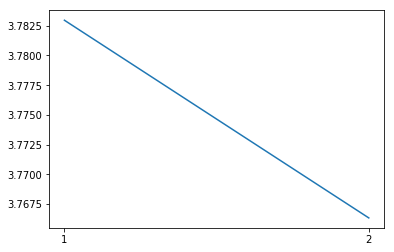

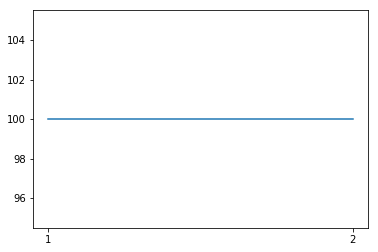

In [56]:
plot_stats("/Users/zeba/Desktop/POC/singularity-vm/datasets/SlowFast/train_stats.txt")